In [15]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_regression, make_blobs
from sklearn.neural_network import MLPRegressor

import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import metrics
import graphviz
from sklearn import tree

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

No GPU was detected. LSTMs and CNNs can be very slow without a GPU.


MLP4
- Wesley Wong
- Kevin Khong


In [16]:
# #create dataframe from our data
df2 = pd.read_csv('/Users/wesleywong/Desktop/SchoolFolders/Spring 2022/CPSC4310notgit/CPSC4310/MLP/MLP2/input/sleepdata2Cleaned.csv',nrows=499)
df2.drop("Unnamed: 0", axis=1, inplace=True)

In [17]:
#only used dataset 2

print(type(df2)) 

#selecting different elements for x
df2selected = df2[['Steps']]
#df2selected = df2[['Time before sleep (seconds)']]

#target 
df2target = df2[["Time asleep (seconds)"]]

<class 'pandas.core.frame.DataFrame'>


In [18]:
X = df2selected
X = X.to_numpy()
y = df2target.values.ravel()

Evaluation Metrics For Alpha Value 0.0001 , and the tanh activation method:
RMSE: 3867.451
R-squared score (training): 0.000
R-squared score (test): -0.000
Evaluation Metrics For Alpha Value 0.1 , and the tanh activation method:
RMSE: 3954.178
R-squared score (training): 0.072
R-squared score (test): -0.066
Evaluation Metrics For Alpha Value 1.0 , and the tanh activation method:
RMSE: 4232.333
R-squared score (training): 0.168
R-squared score (test): -0.008


/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Evaluation Metrics For Alpha Value 100 , and the tanh activation method:
RMSE: 4530.381
R-squared score (training): 0.277
R-squared score (test): -0.009
Evaluation Metrics For Alpha Value 0.0001 , and the relu activation method:
RMSE: 3932.592
R-squared score (training): 0.064
R-squared score (test): -0.018
Evaluation Metrics For Alpha Value 0.1 , and the relu activation method:
RMSE: 44270.338
R-squared score (training): 0.356
R-squared score (test): -0.106
Evaluation Metrics For Alpha Value 1.0 , and the relu activation method:
RMSE: 4632.161
R-squared score (training): 0.072
R-squared score (test): -0.031
Evaluation Metrics For Alpha Value 100 , and the relu activation method:
RMSE: 9305.321
R-squared score (training): 0.208
R-squared score (test): -0.104
Evaluation Metrics For Alpha Value 0.0001 , and the logistic activation method:
RMSE: 3872.781
R-squared score (training): 0.000
R-squared score (test): -0.002
Evaluation Metrics For Alpha Value 0.1 , and the logistic activation me

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Evaluation Metrics For Alpha Value 1.0 , and the logistic activation method:
RMSE: 4348.490
R-squared score (training): 0.422
R-squared score (test): -0.207


/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Evaluation Metrics For Alpha Value 100 , and the logistic activation method:
RMSE: 3969.862
R-squared score (training): 0.285
R-squared score (test): -0.086
(499, 1)
(499,)


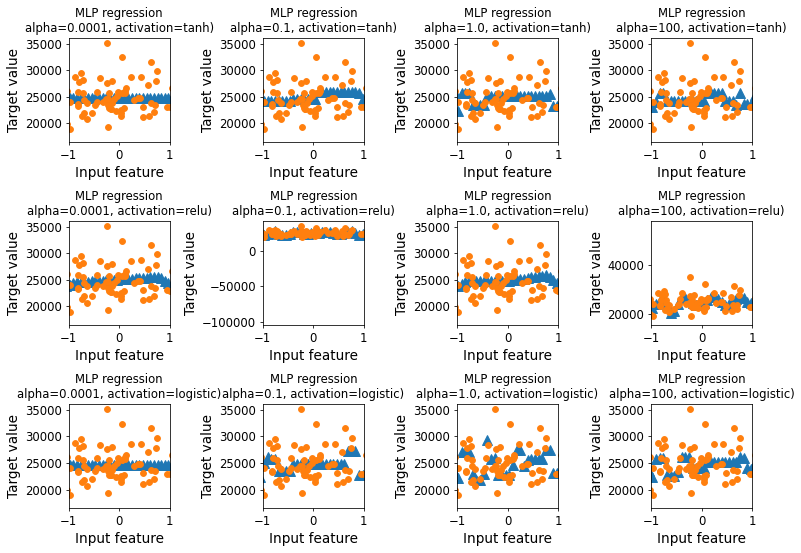

In [19]:
fig, subaxes = plt.subplots(3, 4, figsize=(11,8), dpi=70)

X_predict_input = np.linspace(-3, 3, 84).reshape(-1,1)
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
#X_train, X_test, y_train, y_test = train_test_split(X_scaled[::], y[::],test_size=0.5, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X_scaled[::3], y[::3],test_size=0.5, random_state = 0)

#print(X_train)
#print(y_train)
for thisaxisrow, thisactivation in zip(subaxes, ['tanh', 'relu', 'logistic']):
    for thisalpha, thisaxis in zip([0.0001, 0.1, 1.0, 100], thisaxisrow):
        # create a model
        mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             activation = thisactivation,
                             alpha = thisalpha,max_iter = 10000,
                             solver = 'lbfgs').fit(X_train, y_train)
        
        y_predict_output = mlpreg.predict(X_predict_input)

        print("Evaluation Metrics For Alpha Value", thisalpha,", and the", thisactivation, "activation method:")
        print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predict_output))))

        # train data R2
        print('R-squared score (training): {:.3f}'.format(mlpreg.score(X_train, y_train)))
        # test data R2
        print('R-squared score (test): {:.3f}'.format(mlpreg.score(X_test, y_test)))
        

        thisaxis.set_xlim([-1,1])
        thisaxis.plot(X_predict_input,  y_predict_output,
                     '^', markersize = 10)
        thisaxis.plot(X_train, y_train, 'o')
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('MLP regression\nalpha={}, activation={})'
                          .format(thisalpha, thisactivation))
        plt.tight_layout()

print(X.shape)
print(y.shape)


In [20]:
print(y_test.shape)
print(y_predict_output.shape)

NNrmseScore = np.sqrt(metrics.mean_squared_error(y_test, y_predict_output))
NNtrainSquaredScore = mlpreg.score(X_train, y_train)
NNtestSquaredScore = mlpreg.score(X_test, y_test)

print('RMSE: {:.3f}'.format(NNrmseScore))

# train data R2
print('R-squared score (training): {:.3f}'.format(NNtrainSquaredScore))
# test data R2
print('R-squared score (test): {:.3f}'.format(NNtestSquaredScore))

(84,)
(84,)
RMSE: 3969.862
R-squared score (training): 0.285
R-squared score (test): -0.086


In [21]:
#from adspy_shared_utilities import plot_class_regions_for_classifier
hidden_layers = [10,20,50,100]
for unit in hidden_layers:
    # model training with two hidden layers
    mlpreg = MLPRegressor(hidden_layer_sizes = [unit, unit], solver='lbfgs',max_iter = 10000,
                          random_state = 0).fit(X_train, y_train)


    y_pred = mlpreg.predict(X_test)
    print("hidden layer", unit, "units evaluation:")
    print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    # train data R2
    print('R-squared score (training): {:.3f}'.format(mlpreg.score(X_train, y_train)))
    # test data R2
    print('R-squared score (test): {:.3f}'.format(mlpreg.score(X_test, y_test)))

hidden layer 10 units evaluation:
RMSE: 3875.124
R-squared score (training): 0.000
R-squared score (test): -0.004
hidden layer 20 units evaluation:
RMSE: 3910.361
R-squared score (training): 0.044
R-squared score (test): -0.022
hidden layer 50 units evaluation:
RMSE: 3872.518
R-squared score (training): 0.033
R-squared score (test): -0.003
hidden layer 100 units evaluation:
RMSE: 3887.044
R-squared score (training): 0.036
R-squared score (test): -0.010


In [22]:
#X_valid, y_valid = X_scaled[200:300], y[200:300]
epoch_list = [20, 200, 2000]

model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

for unit in epoch_list:
    optimizer = keras.optimizers.Adam(lr=0.005)
    model.compile(loss="mse", optimizer=optimizer)
    history = model.fit(X_train, y_train, epochs=unit, validation_data=(X_test, y_test))
    print(unit, " epoch layers average loss:")
    model.evaluate(X_test, y_test)

Epoch 1/20


/opt/homebrew/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 45ms/step - loss: 617726912.0000 - val_loss: 625629184.0000
Epoch 2/20
3/3 [==============================] - 0s 5ms/step - loss: 617726336.0000 - val_loss: 625628608.0000
Epoch 3/20
3/3 [==============================] - 0s 5ms/step - loss: 617725696.0000 - val_loss: 625627904.0000
Epoch 4/20
3/3 [==============================] - 0s 5ms/step - loss: 617725056.0000 - val_loss: 625627264.0000
Epoch 5/20
3/3 [==============================] - 0s 6ms/step - loss: 617724480.0000 - val_loss: 625626560.0000
Epoch 6/20
3/3 [==============================] - 0s 5ms/step - loss: 617723776.0000 - val_loss: 625625856.0000
Epoch 7/20
3/3 [==============================] - 0s 6ms/step - loss: 617723200.0000 - val_loss: 625625216.0000
Epoch 8/20
3/3 [==============================] - 0s 9ms/step - loss: 617722560.0000 - val_loss: 625624576.0000
Epoch 9/20
3/3 [==============================] - 0s 10ms/step - loss: 617721920.0000 - val_loss: 625623872.0000
E

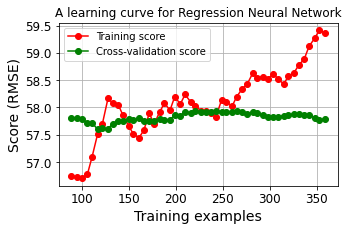

In [23]:
mlpreg = MLPRegressor(hidden_layer_sizes = [1,1],
                             activation = thisactivation,
                             alpha = thisalpha,max_iter = 100000,
                             solver = 'lbfgs').fit(X_train, y_train)

train_sizes = np.linspace(0.2, 0.8, 50)

train_sizes, train_mse, test_mse = learning_curve(mlpreg, X, y, 
                                    train_sizes = train_sizes, 
                                    scoring='neg_root_mean_squared_error', 
                                    cv=10, shuffle=True)

train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))

NN_train_scores_mean = np.mean(train_scores, axis=1)
NN_test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for Regression Neural Network')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, NN_train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, NN_test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

Decision Tree:

KFold(n_splits=10, random_state=None, shuffle=True)
[4659.829339453119, 3170.071775394326, 2973.0821147845922, 3583.045317804597, 2616.4549031097035, 3082.6071705245236, 4412.159168091578, 3151.390979263137, 2811.754782293729, 3387.5727592261487] 
 Average RMSE: 3384.7968309945454
[0.10691955834058009, -0.057902035615006175, -0.046525156706826776, -0.060559234367057346, -0.1923481885989875, -0.027285365466699574, 0.014006963132840444, -0.14234714973562834, 0.4758250300729119, -0.10137691575279084] 
 Average R2: -0.003159249469666414


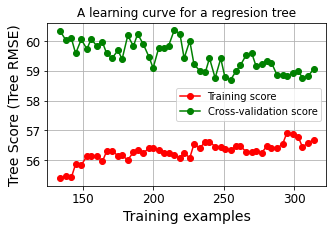

In [24]:
X = df2selected
y = df2target


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.3)

kf = KFold(n_splits=10, random_state=None, shuffle=True)
kf.get_n_splits(X)
print(kf) 

tree_clf = DecisionTreeRegressor(max_depth=3)
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
treermse = []
treer2 = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]

    tree_clf.fit(X_train, y_train)
    
    y_pred = tree_clf.predict(X_test)
    
    treermse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    treer2.append(metrics.r2_score(y_test, y_pred))

print(treermse, '\n Average RMSE:', np.mean(treermse))
print(treer2, '\n Average R2:', np.mean(treer2))


#Learning Curve
train_sizes = np.linspace(0.3, 0.7, 50)

train_sizes, train_mse, test_mse = learning_curve(tree_clf, X, y, 
                                    train_sizes = train_sizes, 
                                    scoring='neg_root_mean_squared_error', 
                                    cv=10, shuffle=True)

train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))

#print(train_scores)
#print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)
tree_test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a regresion tree')
ax.set_xlabel("Training examples")
ax.set_ylabel("Tree Score (Tree RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, tree_test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

Ridge Regression:

Ridge Regression
R-squared score (training): -0.002
R-squared score (test): -0.005
RMSE: 3887.920
ridge regression linear model intercept: [25149.59080156]
ridge regression linear model coeff:
[[-0.03320973]]
Number of non-zero features: 1


/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


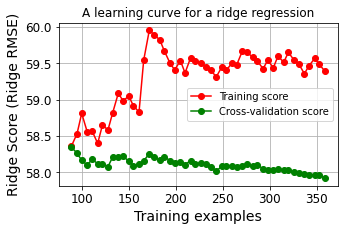

In [25]:
X = df2selected
y = df2target

scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=.01).fit(X_train, y_train)

print('Ridge Regression')
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))

# make predictions on the testing set
y_pred = linridge.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

#Learning Curve
train_sizes = np.linspace(0.2, 0.8, 50)

train_sizes, train_mse, test_mse = learning_curve(linridge, X, y, 
                                    train_sizes = train_sizes, 
                                    scoring='neg_root_mean_squared_error', 
                                    cv=10, shuffle=True)

train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))

train_scores_mean = np.mean(train_scores, axis=1)
ridge_test_scores_mean = np.mean(test_scores, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a ridge regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Ridge Score (Ridge RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, ridge_test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

Linear Regression:

Linear Regression
KFold(n_splits=10, random_state=None, shuffle=True)
0.0011678744898686588
0.0006581244894979799
[2836.0942008680167, 3073.2761816089483, 3376.836423415746, 4576.330844522766, 3369.98891922704, 4521.957843945002, 3082.896699032674, 4224.257533304352, 2636.994252264458, 3099.5693414138823] 
 Average RMSE: 3479.8202239602883
[-0.03956327303539631, -0.03629078446015921, 0.00705460680320702, -0.014047760744053894, -0.03226597233543238, -0.003999550881305103, -0.02864317979884312, -0.036707378200829144, 0.008135532151369529, -0.009050232793831547] 
 Average R2: -0.018537799329527416


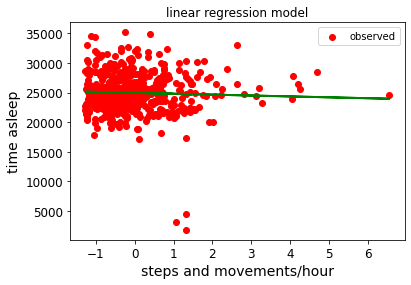

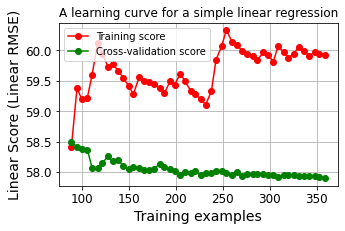

In [26]:
X = df2selected
y = df2target

print("Linear Regression")
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

kf = KFold(n_splits=10, random_state=None, shuffle=True) # Define the split - into 10 folds 

kf.get_n_splits(X)

print(kf) 

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

linearrmse = []
linearr2 = []
for train_index, test_index in kf.split(X):

    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    linearrmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    linearr2.append(metrics.r2_score(y_test, y_pred))

print(linearrmse, '\n Average RMSE:', np.mean(linearrmse))
print(linearr2, '\n Average R2:', np.mean(linearr2))

    
#plot the linear model
plt.scatter(X_scaled, y, c='red', label='observed')
plt.legend(loc='best')

plt.xlabel('steps and movements/hour')
plt.ylabel('time asleep')
plt.title('linear regression model')
plt.plot(X_scaled, model.predict(X_scaled), c='green', label='fitted', linewidth=2)

plt.show()

#Learning Curve
train_sizes = np.linspace(0.2, 0.8, 50)

train_sizes, train_mse, test_mse = learning_curve(model, X, y, 
                                    train_sizes = train_sizes, 
                                    scoring='neg_root_mean_squared_error', 
                                    cv=10, shuffle=True)

train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))

train_scores_mean = np.mean(train_scores, axis=1)
linear_test_scores_mean = np.mean(test_scores, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a simple linear regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Linear Score (Linear RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, linear_test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

Compiled Results

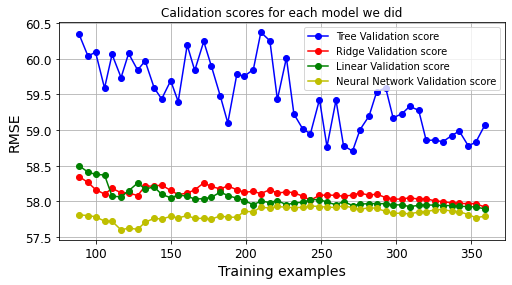

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    
ax.set_title('Calidation scores for each model we did')
ax.set_xlabel("Training examples")
ax.set_ylabel("RMSE")
ax.grid()

ax.plot(train_sizes, tree_test_scores_mean, 'o-', color="b", label="Tree Validation score")
ax.plot(train_sizes, ridge_test_scores_mean, 'o-', color="r", label="Ridge Validation score")
ax.plot(train_sizes, linear_test_scores_mean, 'o-', color="g", label="Linear Validation score")
ax.plot(train_sizes, NN_test_scores_mean, 'o-', color="y", label="Neural Network Validation score")

ax.legend(loc="best")

plt.show()

Ensemble Method: Random Forest

In [28]:
X = df2selected
X = X.to_numpy()
y = df2target.values.ravel()

print(X.shape)
print(y.shape)
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.3)
# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Root Mean Squared Error:', round(np.mean(errors), 2))
# train data R2
print('R-squared score (training): {:.3f}'.format(rf.score(X_train, y_train)))
# test data R2
print('R-squared score (test): {:.3f}'.format(rf.score(X_test, y_test)))

(499, 1)
(499,)
Root Mean Squared Error: 3116.99
R-squared score (training): 0.799
R-squared score (test): -0.645
